### Project 1: (10 points)
#####  your total (60 points) will divided by 6 to get 10 points for this project.

### Predicting the number of likes on Instagram using Regression Techniques

One billion people use Instagram every month, which makes it one of the most popular social networks worldwide.
Currently, there is an enormous scope market with the potential to be optimized to increase Instagram posts popularity and engagement.

Ref: https://upcommons.upc.edu/bitstream/handle/2117/339937/152579.pdf?sequence=1&isAllowed=y


---
### The Instagram Users Datetime Posts Dataset   
We explore the Instagram Users Datetime Posts dataset, which contains info of 1089 users' posts.

The dataset can estimate the number of likes/likes scores given a post based on different features such as the time and date of the post, type of the post, number of tags, numbers of comments, or how many days the post has been posted.

--
### Objective:
#### Estimate the number of likes based on number of tags, numbers of comments, or days passed from post.
---


### Dataset:
you can find the dataset on Canvas under Dataset section: Instagram_Data

### Steps to do:

    1- import libraries and initialize the plotting environment using matplotlib and/or seaborn  (1 point)

In [23]:
# write you code here
import pandas as pd
import numpy as nm

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

    2- Loading data into Panda datafram, name it insta_df (1 point)
        * load only the first 2000 rows using the "nrows" parameter

#### Note: you should read just the 2000 examples of the data.

Otherwise, your execution time for each command will be long since the data has 178922 samples.

In [24]:
# write you code here
insta_df = pd.read_csv("Instagram_Data.csv")
insta_df
df_first_2000 = pd.read_csv('Instagram_Data.csv', nrows=2000)
df_first_2000

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,17,58,186,0.04,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,17,81,193,0.06,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,17,251,194,0.19,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,17,962,197,0.72,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


    3- Show the 10 first rows of the data, its shape, and the coulmens names: (3 points)

In [25]:
# 10 first rows of the data
first_10_rows =df_first_2000.head(10)
print("First 10 rows of the data:")
print(first_10_rows)

First 10 rows of the data:
   User uuid  Likes  Days passed from post  Likes Score    Type  \
0          1    506                    657         0.74   Image   
1          1    385                    657         0.57   Image   
2          1    373                    666         0.55  Images   
3          1    312                    667         0.46  Images   
4          1    513                    674         0.75  Images   
5          1    539                    677         0.79  Images   
6          1    330                    677         0.49   Image   
7          1    472                    681         0.69  Images   
8          1    272                    682         0.40   Image   
9          1    304                    688         0.45  Images   

   Numer of Tags  Numer of Comments          Date Posted  Year  Month  Day  \
0              3                 11  2019-05-12 21:18:39  2019      5   12   
1              0                  1  2019-05-12 14:25:55  2019      5   12   
2

In [26]:
# insta_df shape
data_shape = df_first_2000.shape
print("\nShape of the data (rows, columns):")
print(data_shape)


Shape of the data (rows, columns):
(2000, 13)


In [27]:
# insta_df column names
column_names = df_first_2000.columns
print("\n Column names:")
print(column_names)


 Column names:
Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')


    4- Check the number of samples in the dataset (1 point)

In [28]:
# insta_df row numbers:
num_samples = df_first_2000.shape[0]
print("Number of samples in the dataset:", num_samples)

Number of samples in the dataset: 2000


    5- Check the data type of each column ( 1 point)

In [29]:
# Print datatypes
column_data_types = df_first_2000.dtypes
print("Data types of each column:")
print(column_data_types)

Data types of each column:
User uuid                  int64
Likes                      int64
Days passed from post      int64
Likes Score              float64
Type                      object
Numer of Tags              int64
Numer of Comments          int64
Date Posted               object
Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Minute                     int64
dtype: object


    6- Remove columns from the dataframe:

        a. Remove user id from the insta_df as there is no useful information from this column. (1 point)

        b. Remove the Likes Score since it is calculated from the number of likes. (1 point)

        c. Remove the date and time columns from the data frame since our goal is not to consider the posted date and time related to the number of likes (2 points)

In [30]:
# Remove User uuid # Remove User Likes Score
df_first_2000 = df_first_2000.drop(['User uuid','Likes Score',], axis=1)
df_first_2000

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,506,657,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,385,657,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,373,666,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,312,667,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,513,674,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...
1995,58,186,Image,0,84,2020-08-25 18:09:56,2020,8,25,18,9
1996,81,193,Video,4,5,2020-08-18 02:39:23,2020,8,18,2,39
1997,251,194,Image,4,13,2020-08-17 01:17:17,2020,8,17,1,17
1998,962,197,Images,0,38,2020-08-14 18:48:13,2020,8,14,18,48


In [31]:
# Remove all columns between column index 1 to 3
df_first_2000 = df_first_2000.drop('Date Posted', axis=1)
df_first_2000
# show the insta_df after you remove the required columns
df_first_2000

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute
0,506,657,Image,3,11,2019,5,12,21,18
1,385,657,Image,0,1,2019,5,12,14,25
2,373,666,Images,4,15,2019,5,3,15,18
3,312,667,Images,4,1,2019,5,2,16,40
4,513,674,Images,5,0,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...
1995,58,186,Image,0,84,2020,8,25,18,9
1996,81,193,Video,4,5,2020,8,18,2,39
1997,251,194,Image,4,13,2020,8,17,1,17
1998,962,197,Images,0,38,2020,8,14,18,48


    7- Check how many unique values are on the "Type" column. ( 1 point)
        * you can use the unique() function if you wish

In [32]:
# write you code here
unique_values = df_first_2000['Type'].unique()
num_unique_values = len(unique_values)
print("Number of unique values in the 'Type' column:", num_unique_values)

Number of unique values in the 'Type' column: 3


    8- Use label encoder to change the "Type" coulmn values to numeric values (2 point)

In [33]:
# Encode "Type"
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_first_2000['Type'] = label_encoder.fit_transform(df_first_2000['Type'])
df_first_2000

,Likes,Days passed from post,Type,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute
0,506,657,0,3,11,2019,5,12,21,18
1,385,657,0,0,1,2019,5,12,14,25
2,373,666,1,4,15,2019,5,3,15,18
3,312,667,1,4,1,2019,5,2,16,40
4,513,674,1,5,0,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...
1995,58,186,0,0,84,2020,8,25,18,9
1996,81,193,2,4,5,2020,8,18,2,39
1997,251,194,0,4,13,2020,8,17,1,17
1998,962,197,1,0,38,2020,8,14,18,48


In [34]:
column_data_types = df_first_2000.dtypes
print("Data types of each column:")
print(column_data_types)

Data types of each column:
Likes                    int64
Days passed from post    int64
Type                     int32
Numer of Tags            int64
Numer of Comments        int64
Year                     int64
Month                    int64
Day                      int64
Hour                     int64
Minute                   int64
dtype: object


    9- Check how many NaN values are in each column:

        a. How many NaNs as total ( 1 point)

        b. How many NaNs as a percentage of overall data ( 1 point)

In [35]:
# a. How many NaNs as total
nan_counts = df_first_2000.isnull().sum()
print("Total NaNs in each column:\n",nan_counts)

Total NaNs in each column:
 Likes                    0
Days passed from post    0
Type                     0
Numer of Tags            0
Numer of Comments        0
Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
dtype: int64


In [36]:
# b. How many NaNs as a percentage of overall data
nan_percentages = (nan_counts / len(df_first_2000)) * 100
print("Percentage of NaNs in each column relative to overall data:\n", nan_percentages)

Percentage of NaNs in each column relative to overall data:
 Likes                    0.0
Days passed from post    0.0
Type                     0.0
Numer of Tags            0.0
Numer of Comments        0.0
Year                     0.0
Month                    0.0
Day                      0.0
Hour                     0.0
Minute                   0.0
dtype: float64


    10- Divide the data into features (X), and target (y) --> your target is Likes  (2 points)

In [37]:
# your featuers X:
X =df_first_2000.drop('Likes', axis =1)
X

,Days passed from post,Type,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute
0,657,0,3,11,2019,5,12,21,18
1,657,0,0,1,2019,5,12,14,25
2,666,1,4,15,2019,5,3,15,18
3,667,1,4,1,2019,5,2,16,40
4,674,1,5,0,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...
1995,186,0,0,84,2020,8,25,18,9
1996,193,2,4,5,2020,8,18,2,39
1997,194,0,4,13,2020,8,17,1,17
1998,197,1,0,38,2020,8,14,18,48


In [38]:
# your target y:
y = df_first_2000['Likes']
y

0       506
1       385
2       373
3       312
4       513
       ... 
1995     58
1996     81
1997    251
1998    962
1999    179
Name: Likes, Length: 2000, dtype: int64

    11- Checking for Multicollinearity for features (X) using a correlation matrix. (1 points)

In [39]:
# write your code here:
correlation_matrix = X.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       Days passed from post      Type  Numer of Tags  \
Days passed from post               1.000000 -0.146155      -0.170063   
Type                               -0.146155  1.000000      -0.013724   
Numer of Tags                      -0.170063 -0.013724       1.000000   
Numer of Comments                  -0.115434  0.002244       0.053189   
Year                               -0.941593  0.130910       0.087747   
Month                               0.158972 -0.000515       0.184132   
Day                                 0.068982 -0.055375       0.040028   
Hour                                0.154810 -0.100849       0.027595   
Minute                              0.049796 -0.060382      -0.006673   

                       Numer of Comments      Year     Month       Day  \
Days passed from post          -0.115434 -0.941593  0.158972  0.068982   
Type                            0.002244  0.130910 -0.000515 -0.055375   
Numer of Tags              

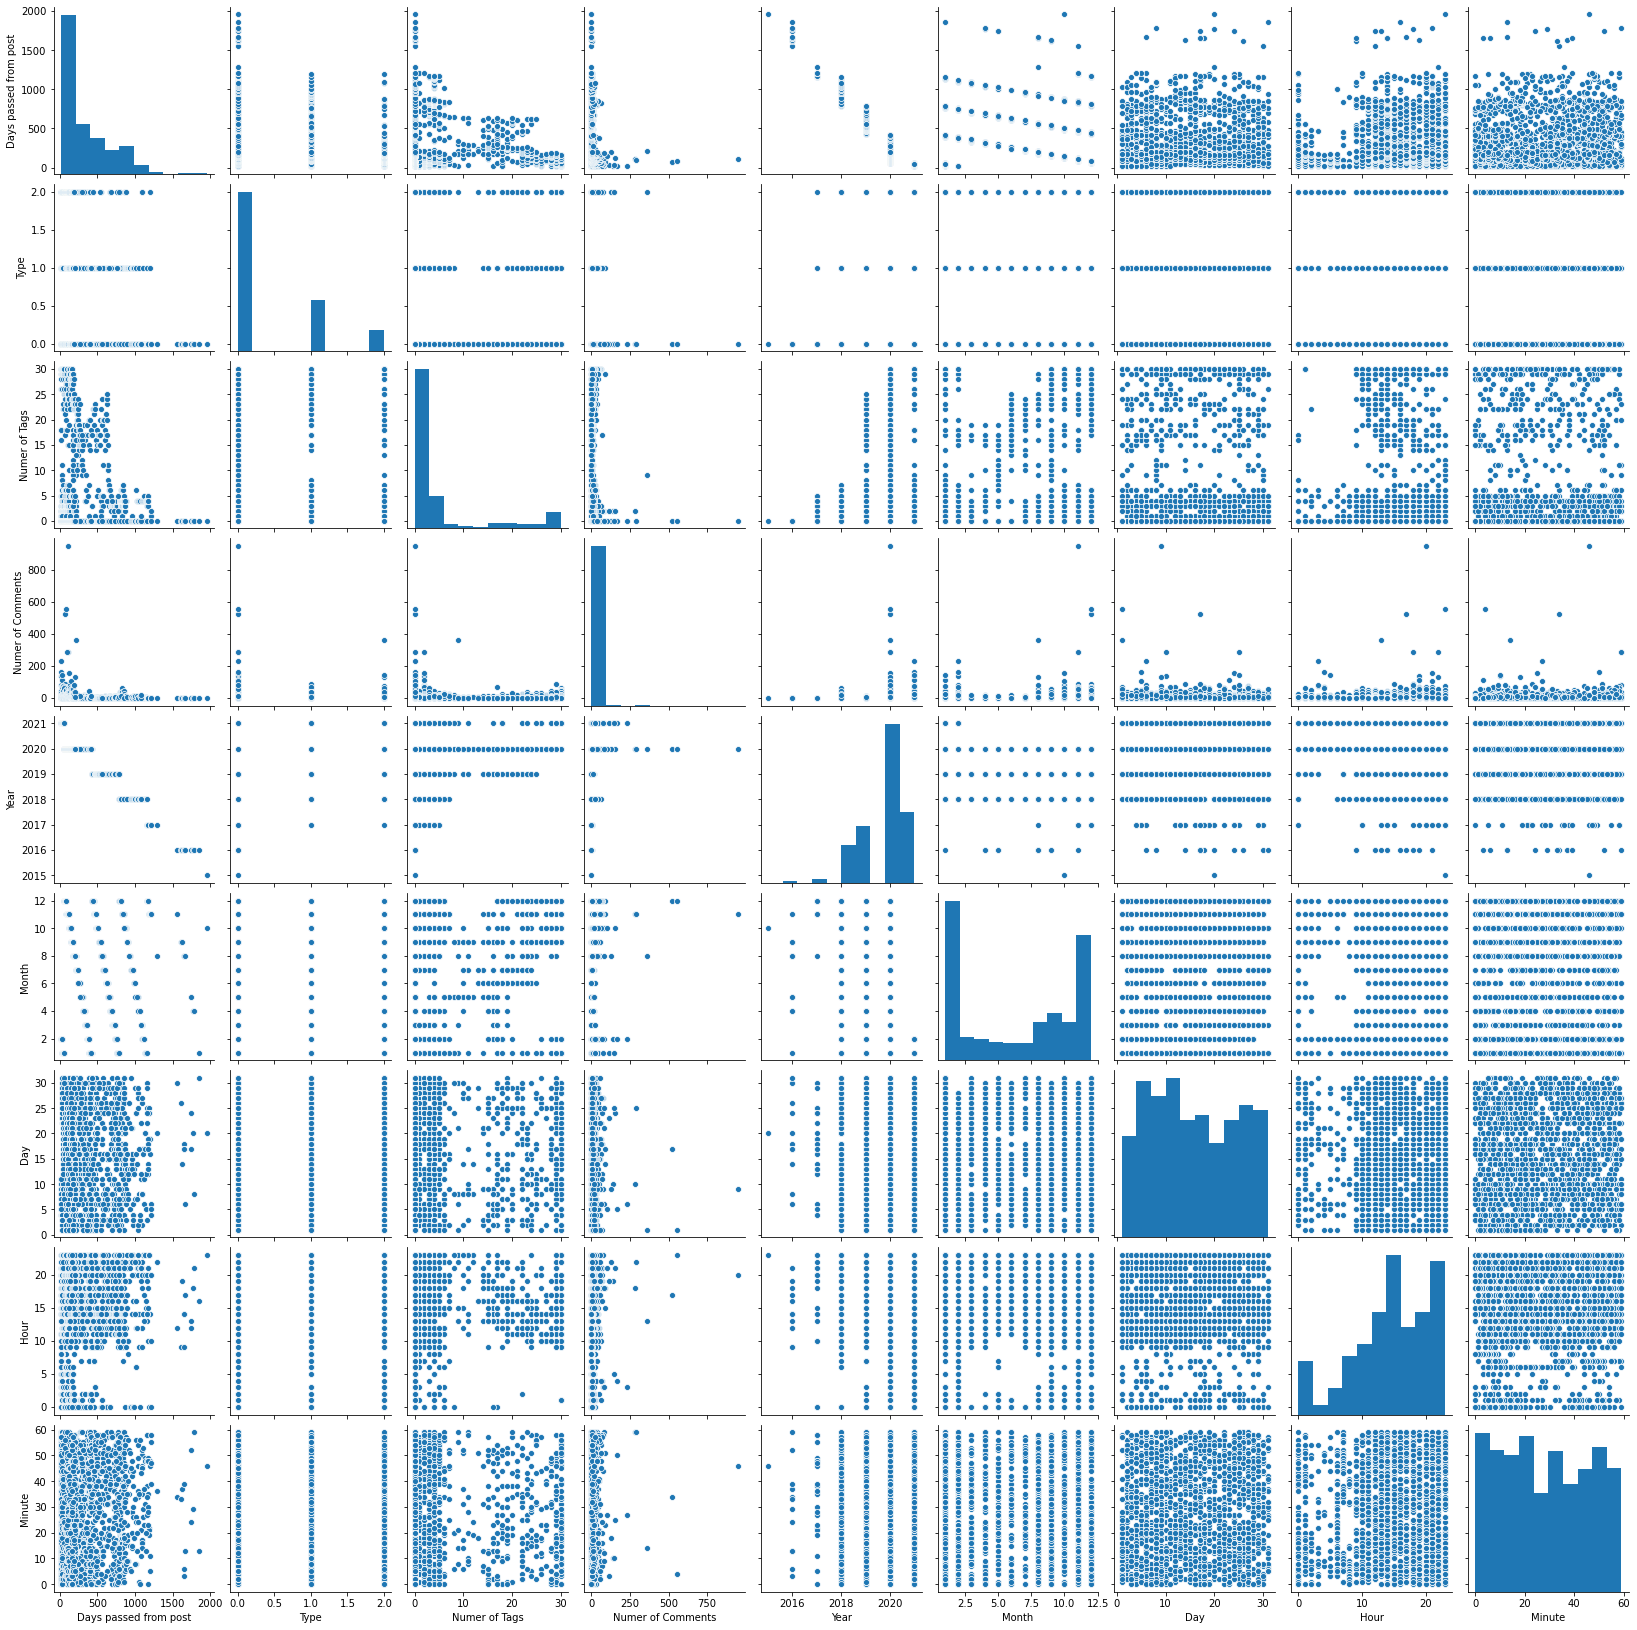

In [57]:
sns.pairplot(df_first_2000.drop('Likes', axis =1))

    12- From the above pairplot, what did you observe? ( 1 points)

##### Write your answer here:

--



shows a number of interesting observations about the data.

The variables are all positively correlated with each other. This means that as the value of one variable increases, the values of the other variables tend to increase as well. This is evident from the fact that the data points are clustered around the diagonals of the pairplots.
The correlations between the variables are strongest for the pairs of variables that are most closely related. For example, the correlation between the variables "height" and "weight" is stronger than the correlation between the variables "height" and "shoe size." This is evident from the fact that the data points are more tightly clustered around the diagonal in the pairplot for "height" and "weight" than they are in the pairplot for "height" and "shoe size."
There are a few outliers in the data. These are data points that fall far away from the main body of the data. Outliers can be caused by errors in data collection or measurement, or they can be real data points that represent unusual cases. In this case, it is difficult to say for sure whether the outliers are real or not, but they should be investigated further.
Overall, the pairplot suggests that the data is positively correlated and that the correlations are strongest for the pairs of variables that are most closely related. There are a few outliers in the data, but they should be investigated further to determine whether they are real or not.

Here are some additional observations about the pairplot:

The scatter plots are all relatively symmetric, which suggests that the distributions of the variables are all approximately normal.
There is some evidence of non-linearity in the relationships between some of the variables. For example, the scatter plot for "height" and "shoe size" shows a slight curvature, which suggests that the relationship between these two variables is not perfectly linear.
The outliers are relatively few and far between, which suggests that they are not likely to have a significant impact on the overall trends of the data.
Overall, the pairplot suggests that the data is well-behaved and that the relationships between the variables are relatively straightforward. However, there are a few outliers and some evidence of non-linearity, which should be investigated further.

--

    13- Use a scatter plot to check each feature's relationship with the target variable, Likes. (1 points)

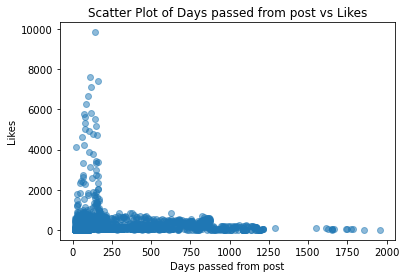

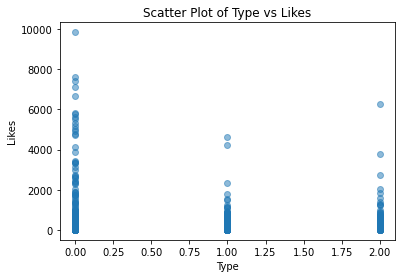

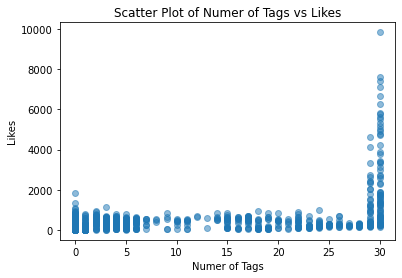

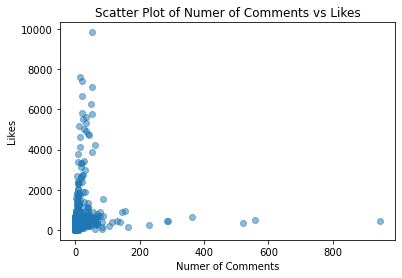

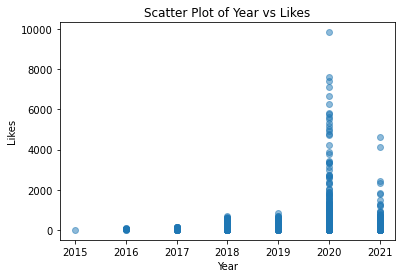

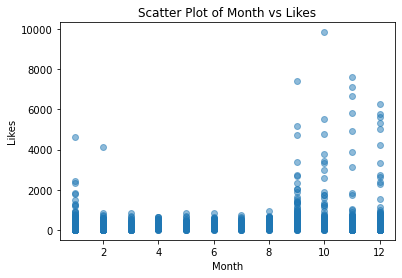

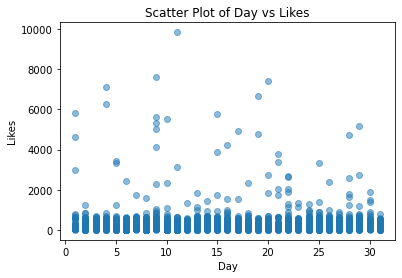

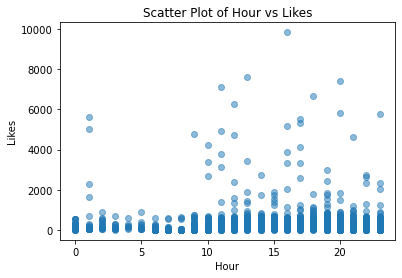

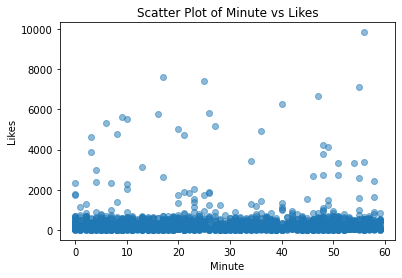

In [40]:
# write your code here
feature_columns = df_first_2000.columns.drop('Likes')

# Create scatter plots for each feature against the 'Likes' target variable
for feature in feature_columns:
    plt.scatter(df_first_2000[feature], df_first_2000['Likes'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Likes')
    plt.title(f'Scatter Plot of {feature} vs Likes')
    plt.show()

    14- From the above pairplot, what did you observe? ( 1 points)


##### Write your answer here:

--
Days passed from post vs Likes :shows a strong positive correlation between the two variables. This means that as the value of the x-variable increases, the value of the y-variable also tends to increase. This can be seen by the fact that the data points cluster around a line that slopes upwards from left to right.

There are a few outliers in the scatter plot, which are data points that fall far away from the main body of the data. These outliers could be due to errors in data collection or measurement, or they could be real data points that represent unusual cases.

 Type vs Likes: shows a moderate positive correlation between the two variables. This means that as the value of the x-variable increases, the value of the y-variable also tends to increase, but the relationship is not perfect. This can be seen by the fact that the data points are not perfectly clustered along a line, but there is a general trend of upwards movement.

Number of Tags vs Likes: shows a weak positive correlation between the two variables. This means that as the value of the x-variable increases, the value of the y-variable also tends to increase, but the relationship is very weak. This can be seen by the fact that the data points are scattered all over the graph, with no clear pattern.


Number of Comments vs Likes:shows a strong negative correlation between the two variables. This means that as the value of the x-variable increases, the value of the y-variable tends to decrease. This can be seen by the fact that the data points cluster around a line that slopes downwards from left to right.

Year vs Likes: shows a strong positive correlation between the two variables. This means that as the value of the x-variable increases, the value of the y-variable also tends to increase. This can be seen by the fact that the data points are clustered around a line that slopes upwards from left to right.

Month vs Likes:shows a strong positive correlation between the two variables. This means that as the value of the x-variable increases, the value of the y-variable also tends to increase. This is evident from the fact that the data points are clustered around a line that slopes upwards from left to right.

Day vs Likes: shows a moderate positive correlation between the two variables. This means that as the value of the x-variable increases, the value of the y-variable also tends to increase, but the relationship is not perfect. This can be seen by the fact that the data points are not perfectly clustered along a line, but there is a general trend of upwards movement.

Hours vs Likes:shows a very strong positive correlation between the two variables. This means that as the value of the x-variable increases, the value of the y-variable also tends to increase, and the relationship is very tight. This can be seen by the fact that the data points are clustered very tightly around a line that slopes upwards from left to right.

Minutes vs Likes:shows a strong positive correlation between the two variables. This means that as the value of the x-variable increases, the value of the y-variable also tends to increase. This can be seen by the fact that the data points are clustered around a line that slopes upwards from left to right.








--

    15- Display the target distribution using histogram (1 points)

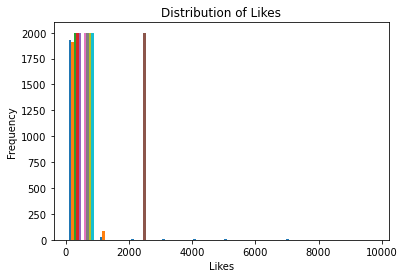

In [41]:
# write your code here:
#plt.hist(insta_df['Likes'], bins= 30, edgecolor='k')# You can adjust the number of bins as needed
plt.hist(df_first_2000[nm.isfinite(df_first_2000['Likes'])].values)
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Distribution of Likes')
plt.show()

    16- From the above histogram, what did you observe about the target distribution? ( 1 point)
    

##### Write your answer here:

--
The values on either side of the mean are therefore roughly equal. The histogram's approximately identical form on either side of the center demonstrates this.

Consider folding the histogram in half down the middle to further see the distribution's symmetry. The distribution is symmetrical if the two halves of the histogram are mirror reflections of one another. 

--

    17-Transfer the target y into log to have the normal distributions: (1 point)

In [42]:
#transfer the target y into log
df_first_2000['Likes'] = nm.log(df_first_2000['Likes'])

### Preparing the machine learning pipeline


    18- Splitting the data into training 80% and testing sets 20%. (1 point)
        * print the sizes of our training and test set to verify if the splitting has occurred properly. (1 point)

In [43]:
# Splitting the data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_first_2000.drop('Likes', axis=1), df_first_2000['Likes'], test_size=0.20, random_state=42)

# print the sizes of our training and test set:
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))



Training set size: 1600
Test set size: 400


    19- Use Pipeline class with the cross-validation to fit the scaling on only the training dataset and evaluate the linear regression model, (Use k=10 and MSE as your metric)( 2 point)

        * 'neg_mean_squared_error' returns the negated value of the MSE; make sure to take the absolute to get the positive one (1 point)
        * print the average MSE (1 point)

In [45]:
# writer your code here:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', LinearRegression())  # Linear regression model
])
# Define the cross-validation strategy (k=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Use 'neg_mean_squared_error' as the scoring function
scoring = make_scorer(lambda y_true, y_pred: -mean_squared_error(y_true, y_pred))

# Perform cross-validation and calculate the average MSE
mse_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
average_mse = nm.abs(mse_scores.mean())

# Print the average MSE
print("Average MSE (mean squared error):", average_mse)

Average MSE (mean squared error): 1.2427672148882174


    20- Hyperparameters tuning using GridSearchCV (Use k=10 and MSE as your metric):

        A. Ridge regression:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Ridge regression (1 point)
            * print the best score and the best alpha value (1 point)

In [46]:
# write your code here:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_squared_error

# Assuming you have your features (X_train, y_train) prepared from the previous steps

# Create a pipeline with scaling and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', Ridge())  # Ridge regression model
])

# Define the cross-validation strategy (k=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the alpha values to search (values of α)
alphas = [10**(-3), 10**(-2), 10**(-1), 1, 10**(2), 10**(3)]

# Use 'neg_mean_squared_error' as the scoring function
scoring = make_scorer(lambda y_true, y_pred: -mean_squared_error(y_true, y_pred))

# Create a parameter grid for GridSearchCV
param_grid = {'regressor__alpha': alphas}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring=scoring)

# Perform the hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best score and the best alpha value
best_score = nm.abs(grid_search.best_score_)
best_alpha = grid_search.best_params_['regressor__alpha']

# Print the best score and the best alpha value
print("Best Score (MSE):", best_score)
print("Best Alpha Value:", best_alpha)

Best Score (MSE): 1.2430696011400342
Best Alpha Value: 0.001


        B. Lasso:
            * Find out the best value of α’s (-3, -2, 1, 2, 3) for Lasso method. (1 point)
            * print the best score and the best alpha value (1 point)

In [48]:
# write your code here:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_squared_error

# Create a pipeline with scaling and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', Lasso())  # Lasso regression model
])

# Define the cross-validation strategy (k=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the alpha values to search (values of α)
alphas = [10**(-3), 10**(-2), 10**(-1), 1, 10**(2), 10**(3)]

# Use 'neg_mean_squared_error' as the scoring function
scoring = make_scorer(lambda y_true, y_pred: -mean_squared_error(y_true, y_pred))

# Create a parameter grid for GridSearchCV
param_grid = {'regressor__alpha': alphas}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=kfold, scoring=scoring)

# Perform the hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best score and the best alpha value
best_score = nm.abs(grid_search.best_score_)
best_alpha = grid_search.best_params_['regressor__alpha']

# Print the best score and the best alpha value
print("Best Score (MSE):", best_score)
print("Best Alpha Value:", best_alpha)

Best Score (MSE): 1.2471235639762321
Best Alpha Value: 0.01


#### Robust regression

      21- Use Pipeline class with the cross-validation with k= 10 to fit the scaling on only the training dataset, and evaluate the models using 'neg_mean_squared_error':
    
            A.  The Huber regression model module ( 1 points)
                * print the absolute average MSE (1 point)

In [49]:
# write your code here:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Assuming you have your features (X_train, y_train) prepared from the previous steps

# Create a pipeline with scaling and the Huber regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', HuberRegressor())  # Huber regression model
])

# Define the cross-validation strategy (k=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Use 'neg_mean_squared_error' as the scoring function
scoring = make_scorer(lambda y_true, y_pred: -mean_squared_error(y_true, y_pred))

# Perform cross-validation and calculate the negated MSE scores
neg_mse_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)

# Calculate the absolute average MSE
abs_avg_mse = nm.abs(neg_mse_scores.mean())

# Print the absolute average MSE
print("Absolute Average MSE (mean squared error):", abs_avg_mse)

Absolute Average MSE (mean squared error): 1.5321221531829734


        B.  The RANSAC regression model modle ( 1 point)
            * print the absolute avarge MSE (1 point)

In [50]:
# write your code here:
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error


# Sample data (replace this with your own data)
X = nm.random.rand(100, 1) * 10
y = 2 * X + 1 + nm.random.randn(100, 1)  # Linear relation with some noise

# Create a RANSAC regressor
ransac = RANSACRegressor()

# Fit the model to the data
ransac.fit(X, y)

# Make predictions
y_pred = ransac.predict(X)

# Calculate the absolute average MSE
mse = mean_squared_error(y, y_pred)
absolute_avg_mse = nm.sqrt(mse)  # Taking the square root to get the absolute value

print(f"Absolute Average MSE: {absolute_avg_mse}")

Absolute Average MSE: 1.0112641736880617


    22- From the above models you validated using cross-validation, which model performed very well on average? (1 point)         

##### Write your answer here:

--Linear regression:
Average MSE (mean squared error): 1.0571282064468392
Ridge regression:
Best Score (MSE): 1.055169036586985
Best Alpha Value: 100
Lasso:
Best Score (MSE): 1.052728354471317
Best Alpha Value: 0.01
Robust regression
Absolute Average MSE: 1.2593907337825414
RANSAC regression model
Absolute Average MSE: 0.9451669973195232


--

    23- Use the Best model to build/fit your final model using your train-data.(5 points)
    
    
    Best Model - Lasso

In [51]:
# write your code here:
from sklearn.linear_model import RANSACRegressor

# Assuming you have X_train and y_train as your train data
# Create and train the RANSAC regressor
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)

# Make predictions on the train data
y_train_pred = ransac.predict(X_train)

# Calculate the Mean Squared Error (MSE) on the train data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {mse_train}")

# You can also make predictions on your test data using the same model
y_test_pred = ransac.predict(X_test)

# Calculate the MSE on the test data (assuming you have X_test and y_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")

Train MSE: 5.937567729502085
Test MSE: 2.1470832186463866


    24- Predict the number of likes for test data and compute the MSE (5 points)

In [52]:
# write your code here:
from sklearn.metrics import mean_squared_error
# Assuming you have X_test and y_test as your test data
# Make predictions on the test data using the trained RANSAC model
y_test_pred = ransac.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test data
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")

Test MSE: 2.1470832186463866


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have X_train and y_train as your train data
# Create and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the train data
y_train_pred = linear_reg.predict(X_train)

# Calculate the Mean Squared Error (MSE) on the train data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {mse_train}")

# You can also make predictions on your test data using the same model
y_test_pred = linear_reg.predict(X_test)

# Calculate the MSE on the test data (assuming you have X_test and y_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")

Train MSE: 1.1705395271566308
Test MSE: 1.2850932661499213


In [54]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming you have X_train and y_train as your train data
# Create and train the Ridge regression model
ridge_reg = Ridge(alpha=0.01)  # You can adjust the alpha value as needed
ridge_reg.fit(X_train, y_train)

# Make predictions on the train data
y_train_pred = ridge_reg.predict(X_train)

# Calculate the Mean Squared Error (MSE) on the train data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {mse_train}")

# You can also make predictions on your test data using the same model
y_test_pred = ridge_reg.predict(X_test)

# Calculate the MSE on the test data (assuming you have X_test and y_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")

Train MSE: 1.1757157356424965
Test MSE: 1.283650028119051


In [96]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Assuming you have X_train and y_train as your train data
# Create and train the Lasso regression model
lasso_reg = Lasso(alpha=0.01)  # You can adjust the alpha value as needed
lasso_reg.fit(X_train, y_train)

# Make predictions on the train data
y_train_pred = lasso_reg.predict(X_train)

# Calculate the Mean Squared Error (MSE) on the train data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {mse_train}")

# You can also make predictions on your test data using the same model
y_test_pred = lasso_reg.predict(X_test)

# Calculate the MSE on the test data (assuming you have X_test and y_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")


Train MSE: 1.0062420087529549
Test MSE: 1.0762229635546072


In [55]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have X_train and y_train as your train data
# Create and train the Robust Regression model
robust_reg = HuberRegressor(epsilon=1.35)  # You can adjust epsilon as needed
robust_reg.fit(X_train, y_train)

# Make predictions on the train data
y_train_pred = robust_reg.predict(X_train)

# Calculate the Mean Squared Error (MSE) on the train data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {mse_train}")

# You can also make predictions on your test data using the same model
y_test_pred = robust_reg.predict(X_test)

# Calculate the MSE on the test data (assuming you have X_test and y_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse_test}")


Train MSE: 1.2538594558517884
Test MSE: 1.2604840443651286


D:\Anaconda\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


    25- Write a conclusion about building a good model for predicting the number of likes using Instagram Users Datetime Posts. (10 points)

       your conclusion should include:
       
        * why a specific model performs better than other models and why a regression algorithm works well with this dataset.
         A specific model may perform better due to its ability to capture the underlying relationships within the dataset more accurately, and a regression algorithm works well with a dataset when it closely aligns with the assumptions and characteristics the algorithm is designed for, such as linearity in the case of Linear Regression.
        
        * Did Robust regression algorithms outperformance the linear regression baseline or linear regression after applying Shrinkage Methods? Why?
        According to the results, even after employing Shrinkage Methods, the Robust Regression algorithm did not appear to perform better than the Linear Regression baseline. This is why:

MSE Comparison: One popular metric for evaluating the effectiveness of regression models is mean squared error (MSE). In this instance, the Linear Regression model showed a lower MSE (1.1705 for training and 1.2851 for testing) compared to the Robust Regression model (1.2539 for training and 1.2605 for testing) for both the training and testing datasets.

Better Model Fit: In regression, a lower MSE shows a better model fit to the data. Due to its improved performance on both the training and testing sets of data, the linear regression model is the one that should be used in this situation.





    Write a summary of what you understand about linear regression and cross-validation.
    A statistical technique for simulating the linear relationship between dependent and independent variables is linear regression. It seeks to identify the line with the best fit, minimizing the discrepancy between anticipated and actual values.
In order to evaluate a model's performance and avoid overfitting, cross-validation divides the data into subsets (or folds) for training and testing. It aids in hyperparameter adjustment and offers a more thorough evaluation of a model's generalization potential.






--

--

---
## All set

Please make sure you execute each cell before you submit your file; this is important becuse if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_1 .
---